# Topic Modeling

Every day, vast amounts of data are being collected, leading to challenges in accessing the specific information we seek. To tackle this issue, we require effective tools and techniques to organize, search, and comprehend such vast quantities of information.

Topic modelling offers methods that aid in organizing, understanding, and summarizing extensive collections of textual data. It facilitates the identification of concealed topical patterns prevalent across the dataset, annotating documents based on these topics, and utilizing these annotations to organize, search, and summarize the texts.

In essence, topic modelling involves identifying groups of words (i.e., topics) from a collection of documents that best represent the overall information. It can be viewed as a form of text mining, extracting recurring patterns of words from textual content.

In our project, we will employ unsupervised techniques to cluster or group reviews, thereby identifying the main topics or ideas present in the sea of text. While this approach is applicable to any textual reviews, we will focus on Twitter data, which presents a more real-world and complex challenge compared to reviews obtained from traditional survey forms.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
raw_data = pd.read_csv("tweets.csv")

In [4]:
df = raw_data
df

,username,date,tweet,mentions
0,shivaji_takey,10-06-2020,Please check what happens to this no 940417705...,['vodafonein']
1,sarasberiwala,10-06-2020,Network fluctuations and 4G Speed is pathetic....,['vodafonein']
2,chitreamod,10-06-2020,This has been going on since 3rd... this absol...,['vodafonein']
3,sanjan_suman,10-06-2020,@VodafoneIN I have done my recharge of 555 on...,['vodafonein']
4,t_nihsit,10-06-2020,But when???Still I am not received any call fr...,['vodafonein']
...,...,...,...,...
21042,mvjdobhal,31-05-2020,I sent u my contact no. But still did not get ...,['vodafonein']
21043,valleyofpeace2,31-05-2020,dear @VodafoneIN i have bn facing ur network ...,['vodafonein']
21044,mushtabaarshad,31-05-2020,rubbish i made many time @VodafoneIN you didn...,['vodafonein']
21045,gouravgv,31-05-2020,Why the caller tunes sound so horrible? if a s...,"['airtelindia', 'idea', 'vodafonein', 'bsnlcor..."


In [5]:
unique_text = df['tweet'].unique()
len(unique_text)

21047

In [6]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text

### remove Twitter usernames (mentions) starting with "@"

In [7]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

### remove all characters that are not alphabets (both lowercase and uppercase) or the "#" symbol, replacing them with a space

In [8]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

### convert all the text in the 'clean_tweet' column to lowercase

In [9]:
df['clean_tweet'] = df['clean_tweet'].str.lower()

### filter out words with a length less than or equal to 2 characters

In [10]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

### split each text in the 'clean_tweet' column into individual words

In [11]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())

In [12]:
tokenized_tweet

0        [please, check, what, happens, this, not, woki...
1        [network, fluctuations, and, speed, pathetic, ...
2        [this, has, been, going, since, this, absolute...
3        [have, done, recharge, but, haven, got, perday...
4        [but, when, still, not, received, any, call, f...
                               ...                        
21042    [sent, contact, but, still, did, not, get, res...
21043    [dear, have, facing, network, problem, for, fe...
21044    [rubbish, made, many, time, you, didn, resolve...
21045    [why, the, caller, tunes, sound, horrible, son...
21046    [what, nonsense, are, guys, saying, getting, a...
Name: clean_tweet, Length: 21047, dtype: object

### This step essentially converts the list of tokens back into the original tweet text format.

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['clean_tweet'] = tokenized_tweet

In [14]:
df.loc[:, ('clean_tweet')]

0        please check what happens this not woking sinc...
1        network fluctuations and speed pathetic need j...
2        this has been going since this absolutely unpr...
3        have done recharge but haven got perday with u...
4        but when still not received any call from cust...
                               ...                        
21042          sent contact but still did not get response
21043    dear have facing network problem for few days ...
21044    rubbish made many time you didn resolved netwo...
21045    why the caller tunes sound horrible song heard...
21046    what nonsense are guys saying getting all the ...
Name: clean_tweet, Length: 21047, dtype: object

In [15]:
df.drop_duplicates(subset=['clean_tweet'], keep='first', inplace=True)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.shape

(19762, 5)

In [18]:
df['clean_tweet_length'] = df['clean_tweet'].apply(len)

In [19]:
df[df['clean_tweet_length'] == 0]

,username,date,tweet,mentions,clean_tweet,clean_tweet_length
20,omanmessi,10-06-2020,@VodafoneIN,"['ooredoooman', 'vodafonein']",,0


In [20]:
indexes = df[df['clean_tweet_length'] ==0]['clean_tweet'].index

In [21]:
df.drop(index=indexes, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19761 entries, 0 to 19761
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   username            19761 non-null  object
 1   date                19761 non-null  object
 2   tweet               19761 non-null  object
 3   mentions            19761 non-null  object
 4   clean_tweet         19761 non-null  object
 5   clean_tweet_length  19761 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [23]:
df.reset_index(drop=True, inplace=True)

In general, the provided code demonstrates the use of the CountVectorizer from the sklearn library to perform text vectorization on a collection of tweets. The CountVectorizer converts the text data into a numerical format, where each tweet is represented as a vector containing word frequencies. The code sets certain parameters to preprocess the text, such as removing stop words and filtering out words based on their document frequency. Finally, the result is a sparse matrix, desc_matrix, representing the bag-of-words representation of the tweets, ready for further analysis or modeling tasks.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer="word", ngram_range=(1, 1), stop_words="english", min_df = 0.0001, max_df = 0.7)
count_vect.fit(df['clean_tweet'])
desc_matrix = count_vect.transform(df['clean_tweet'])
desc_matrix

CountVectorizer(max_df=0.7, min_df=0.0001, stop_words='english')

<19761x6743 sparse matrix of type '<class 'numpy.int64'>'
	with 198134 stored elements in Compressed Sparse Row format>

In [25]:
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [26]:
desc_matrix.shape

(19761, 6743)

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

The provided code implements the "Elbow Method" to determine the optimal number of clusters (k) for the K-means clustering algorithm. It iterates through a range of k values, fits K-means models for each value, and calculates the inertia (sum of squared distances within each cluster) as a measure of clustering performance. The code then plots the inertia values against the corresponding k values, allowing us to visually identify the "elbow point" on the graph. The elbow point represents the optimal k value, striking a balance between compactness and separation of clusters. This method aids in making an informed decision about the appropriate number of clusters for the given dataset and helps improve the effectiveness of the K-means clustering analysis.

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 0, 'Nombre de clusters (k)')

Text(0, 0.5, 'Inertie')

Text(0.5, 1.0, 'Méthode du coude pour déterminer k')

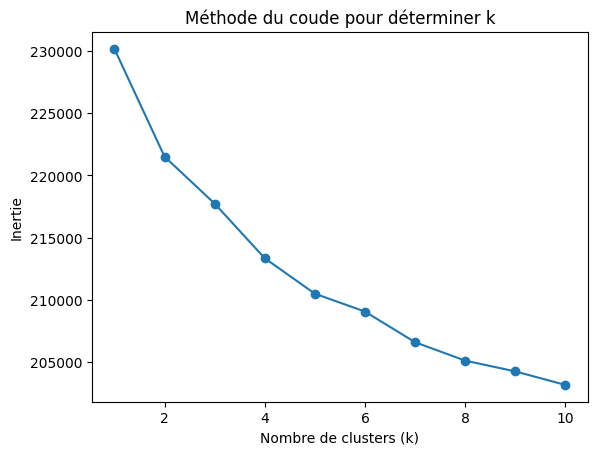

In [28]:
inertias = []

# Valeurs de k à tester (par exemple, de 1 à 10)
k_values = range(1, 11)

for k in k_values:
    # Créer un modèle K-means avec le nombre de clusters k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajuster le modèle aux données
    kmeans.fit(desc_matrix)
    
    # Récupérer l'inertie (somme des carrés des distances intra-cluster)
    inertia = kmeans.inertia_
    
    # Ajouter l'inertie à la liste
    inertias.append(inertia)

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer k')
plt.show()

The provided code implements the "Silhouette Method" to determine the optimal number of clusters (k) for the K-means clustering algorithm. It performs a series of K-means clustering with varying numbers of clusters (k) on the given data and calculates the silhouette scores for each clustering result. The silhouette score measures the quality of clustering, indicating how well-separated and compact the clusters are.

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

Text(0.5, 0, 'Nombre de clusters (k)')

Text(0, 0.5, 'Coefficient de silhouette')

Text(0.5, 1.0, 'Méthode de la silhouette pour déterminer k')

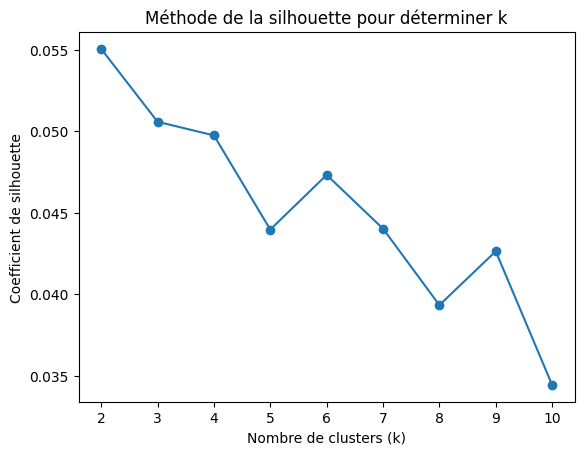

In [29]:
silhouette_scores = []

# Valeurs de k à tester (par exemple, de 2 à 10)
k_values = range(2, 11)

for k in k_values:
    # Créer un modèle K-means avec le nombre de clusters k
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajuster le modèle aux données
    kmeans.fit(desc_matrix)
    
    # Prédire les clusters pour chaque échantillon
    cluster_labels = kmeans.predict(desc_matrix)
    
    # Calculer le coefficient de silhouette pour le clustering
    silhouette_avg = silhouette_score(desc_matrix, cluster_labels)
    
    # Ajouter le coefficient de silhouette à la liste
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du coefficient de silhouette en fonction du nombre de clusters
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Coefficient de silhouette')
plt.title('Méthode de la silhouette pour déterminer k')
plt.show()

This code defines a function identify_topics that performs K-means clustering on text data and generates word clouds for each cluster to visualize the main topics. It uses a custom Twitter bird image as the shape for the word clouds, creating a visual representation of frequently occurring words within each cluster.

In [51]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {"Tweet": df['clean_tweet'], "Clusters": clusters}
    frame = pd.DataFrame(tweets)
    print(frame["Clusters"].value_counts())

    for cluster in range(len(clusters)):
        cluster_words = ' '.join(text for text in frame[frame["Clusters"] == cluster]["Tweet"])
        if cluster_words:
            Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
            image_colors = ImageColorGenerator(Mask)
            wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster_words)
            plt.figure(figsize=(10,20))
            plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
            plt.axis('off')
            plt.title(f"Cluster {cluster}")
            plt.show()


Based on the silhouette score and the elbow method, I have specified the number of clusters as 3 in this code. The silhouette score helps evaluate the quality of clustering, while the elbow method aids in identifying the optimal number of clusters.

0    12778
1     3685
2     3298
Name: Clusters, dtype: int64


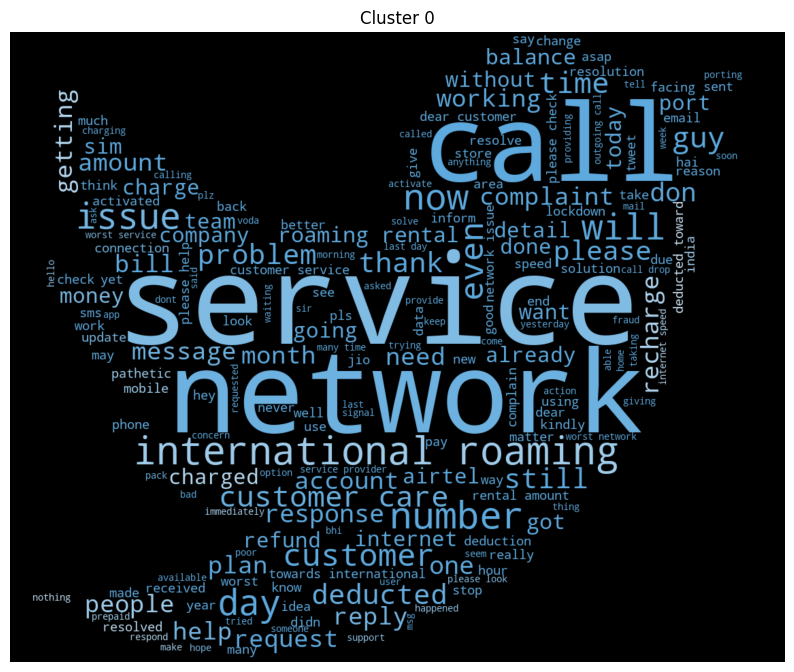

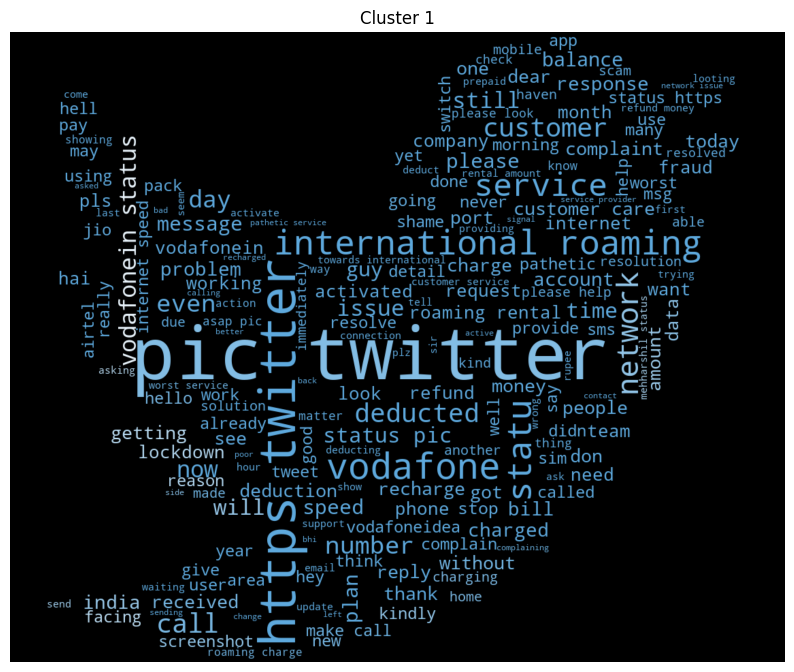

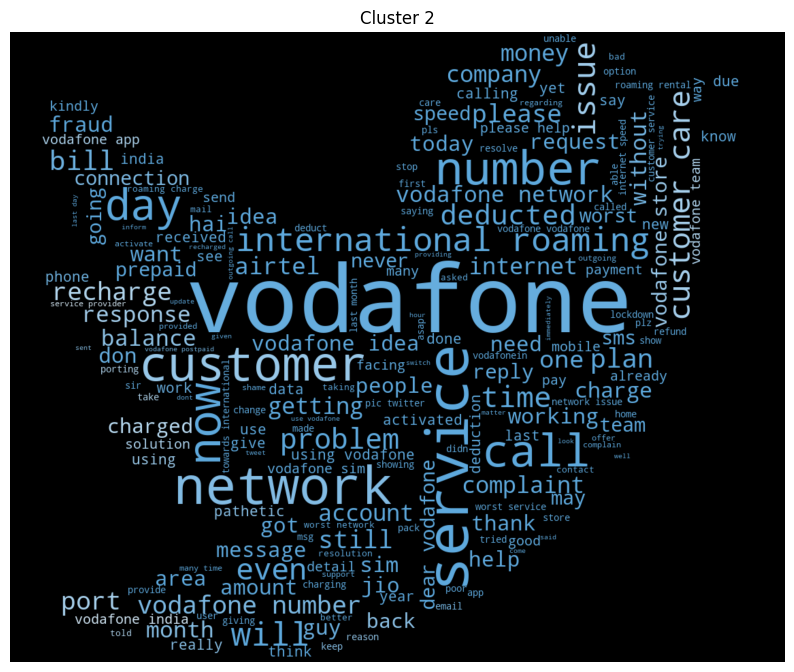

In [52]:
identify_topics(df, desc_matrix, 3)